# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"         #!!!!!!!!!!!

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Set np.random.seed
np.random.seed(11)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?" # + "appid=" + weather_api_key + "&q="
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#cities_list = ["new norfolk","rikitea","saleaula"]                      #!!!!!!!!!!!

#store responses
response_json = []

#store city number
num_of_city = 0

#store data for DataFrame
city_ = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [8]:
print("Beginning Data Retrieval")
print("-------------------------------------")

for city in cities:
    
# Build query URL
    city_data = requests.get(query_url + city).json()

    
    try:
        response_json.append(city_data)
        num_of_city += 1
        city_.append(city_data['name'])
        cloudiness.append(city_data['clouds']['all'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        humidity.append(city_data['main']['humidity'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        wind_speed.append(city_data['wind']['speed'])
        print(f" Processing Record {(num_of_city)}: {city_data['name']}.")

    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
 Processing Record 1: New Norfolk.
 Processing Record 2: Rikitea.
City not found. Skipping...
 Processing Record 4: Port Hawkesbury.
 Processing Record 5: Alyangula.
 Processing Record 6: Puerto Ayora.
 Processing Record 7: Punta Arenas.
 Processing Record 8: Hithadhoo.
 Processing Record 9: Barrow.
City not found. Skipping...
 Processing Record 11: Areosa.
 Processing Record 12: Mar del Plata.
 Processing Record 13: Saskylakh.
 Processing Record 14: Tasiilaq.
 Processing Record 15: Cape Town.
 Processing Record 16: Cabañas.
 Processing Record 17: Albany.
 Processing Record 18: Geraldton.
 Processing Record 19: Mataura.
 Processing Record 20: Rabo de Peixe.
 Processing Record 21: Boddam.
 Processing Record 22: Lüderitz.
 Processing Record 23: Ahipara.
 Processing Record 24: Port Alfred.
 Processing Record 25: Kumul.
 Processing Record 26: Ponta do Sol.
 Processing Record 27: Ushuaia.
 Processing Record 28: Faanui.
 Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict = {
    "City": city_,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max_temp": max_temp,
    "Wind_speed": wind_speed
}

In [10]:
# count by column of weather_data Data frame
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max_temp      568
Wind_speed    568
dtype: int64

In [11]:
# Data frame of weather_data
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
0,New Norfolk,90,AU,1586970931,82,-42.78,147.06,62.01,5.82
1,Rikitea,58,PF,1586970931,68,-23.12,-134.97,75.69,2.84
2,Port Hawkesbury,90,CA,1586970710,93,45.62,-61.35,39.00,2.24
3,Alyangula,7,AU,1586970931,100,-13.85,136.42,73.40,6.89
4,Puerto Ayora,40,EC,1586970931,74,-0.74,-90.35,84.20,12.75


In [12]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv(output_data_file, index=True)

In [23]:
Date_ = dt.date.today().strftime("%m/%d/%y")
Date_

'04/15/20'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

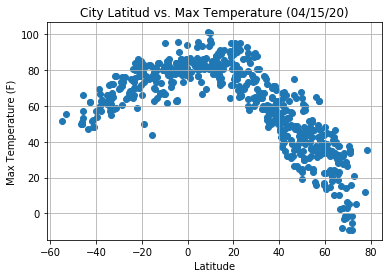

In [24]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Max_temp']
plt.scatter(x_values,y_values)
plt.title('City Latitud vs. Max Temperature' + " " + "(" + (Date_) +")")                #!!!!!!!!!!!
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

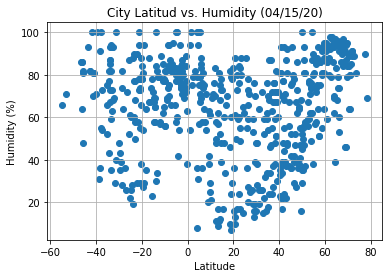

In [25]:
# Create a Scatter Plot for latitude vs humidity
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitud vs. Humidity' + " " + "(" + (Date_) +")")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

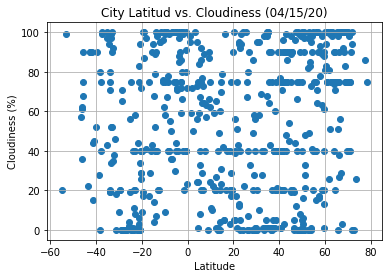

In [26]:
# Create a Scatter Plot for latitude vs humidity
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitud vs. Cloudiness' + " " + "(" + (Date_) +")")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

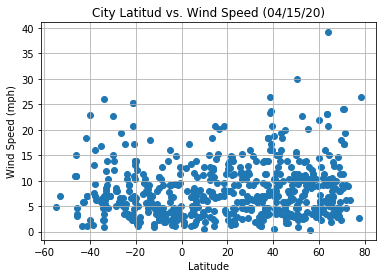

In [27]:
# Create a Scatter Plot for latitude vs humidity
x_values = weather_data['Lat']
y_values = weather_data['Wind_speed']
plt.scatter(x_values,y_values)
plt.title('City Latitud vs. Wind Speed' + " " + "(" + (Date_) +")")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [28]:
# OPTIONAL: Create a function to create Linear Regression plots


In [29]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere Data Frame (greater than or equal to 0 degrees latitude)

northern_df = weather_data.loc[weather_data['Lat'] >= 0]
northern_df


#Southern Hemisphere Data Frame (less than 0 degrees latitude)

southern_df = weather_data.loc[weather_data['Lat'] <0]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
0,New Norfolk,90,AU,1586970931,82,-42.78,147.06,62.01,5.82
1,Rikitea,58,PF,1586970931,68,-23.12,-134.97,75.69,2.84
3,Alyangula,7,AU,1586970931,100,-13.85,136.42,73.40,6.89
4,Puerto Ayora,40,EC,1586970931,74,-0.74,-90.35,84.20,12.75
5,Punta Arenas,99,CL,1586970931,71,-53.15,-70.92,55.40,6.93


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7863191256023014


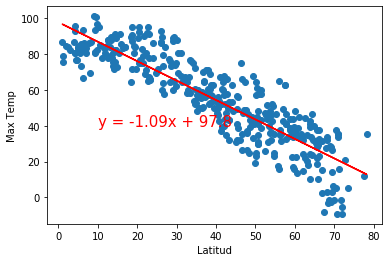

In [30]:
north_lat_reg = northern_df["Lat"].astype('float')
north_max_temp_reg = northern_df["Max_temp"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_reg, north_max_temp_reg)
regress_values = north_lat_reg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(north_lat_reg,north_max_temp_reg)

# Plot regression line
plt.plot(north_lat_reg,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitud')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5295848893547708


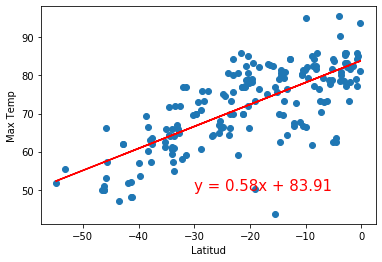

In [31]:
South_lat_reg = southern_df["Lat"].astype('float')
South_max_temp_reg = southern_df["Max_temp"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat_reg, South_max_temp_reg)
regress_values = South_lat_reg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(South_lat_reg,South_max_temp_reg)

# Plot regression line
plt.plot(South_lat_reg,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitud')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.12392204257838418


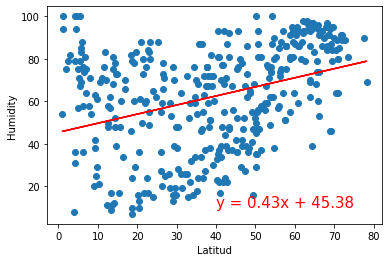

In [32]:
north_humidity_reg = northern_df["Humidity"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_reg, north_humidity_reg)
regress_values = north_lat_reg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(north_lat_reg,north_humidity_reg)

# Plot regression line
plt.plot(north_lat_reg,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitud')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.006815374680705328


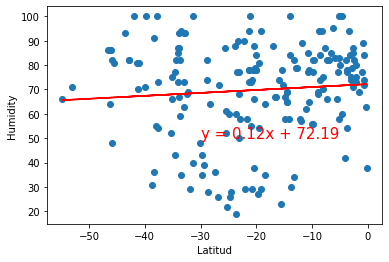

In [33]:
South_humidity_reg = southern_df["Humidity"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat_reg, South_humidity_reg)
regress_values = South_lat_reg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(South_lat_reg,South_humidity_reg)

# Plot regression line
plt.plot(South_lat_reg,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitud')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.05694505679609158


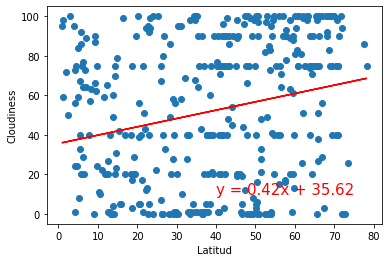

In [34]:
north_cloudiness_reg = northern_df["Cloudiness"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_reg, north_cloudiness_reg)
regress_values = north_lat_reg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(north_lat_reg,north_cloudiness_reg)

# Plot regression line
plt.plot(north_lat_reg,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitud')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.028624360624461827


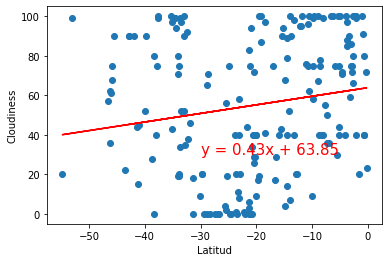

In [35]:
South_cloudiness_reg = southern_df["Cloudiness"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat_reg, South_cloudiness_reg)
regress_values = South_lat_reg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(South_lat_reg,South_cloudiness_reg)

# Plot regression line
plt.plot(South_lat_reg,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitud')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.017829721204804284


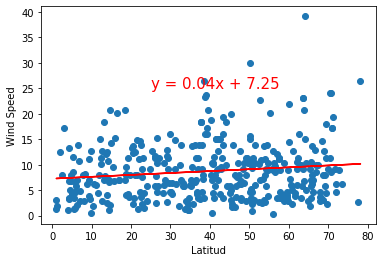

In [36]:
north_wind_reg = northern_df["Wind_speed"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_reg, north_wind_reg)
regress_values = north_lat_reg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(north_lat_reg,north_wind_reg)

# Plot regression line
plt.plot(north_lat_reg,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitud')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.033500107464414994


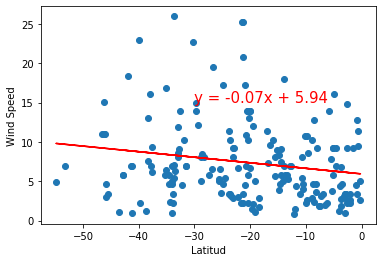

In [37]:
South_wind_reg = southern_df["Wind_speed"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat_reg, South_wind_reg)
regress_values = South_lat_reg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(South_lat_reg,South_wind_reg)

# Plot regression line
plt.plot(South_lat_reg,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitud')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()